# **Proyek Analisis Data: E-commerce Public Dataset**
- **Nama:** Wan Sabrina Mayzura
- **Email:** wansabrina.ws@gmail.com
- **ID Dicoding:** wansabrinaa

# Menentukan Pertanyaan Bisnis

- Negara bagian mana yang paling *valuable* (penjualan total tertinggi dan jumlah pelanggan terbanyak) di Brazil?
- Apakah penjualan e-commerce di Brazil mengalami pertumbuhan dari waktu ke waktu?

# Import Semua Packages/Library yang Digunakan

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from IPython.display import display
from google.colab import drive

# Data Wrangling

## Gathering Data

In [137]:
drive.mount('/drive')

data_dir = "/drive/MyDrive/E-Commerce Public Dataset/"

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [138]:
dataframes = {
    'customers': pd.read_csv(data_dir + 'customers_dataset.csv'),
    'sellers': pd.read_csv(data_dir + 'sellers_dataset.csv'),
    'products': pd.read_csv(data_dir + 'products_dataset.csv'),
    'category': pd.read_csv(data_dir + 'product_category_name_translation.csv'),
    'orders': pd.read_csv(data_dir + 'orders_dataset.csv'),
    'items': pd.read_csv(data_dir + 'order_items_dataset.csv'),
    'payments': pd.read_csv(data_dir + 'order_payments_dataset.csv'),
    'reviews': pd.read_csv(data_dir + 'order_reviews_dataset.csv'),
    'geolocation': pd.read_csv(data_dir + 'geolocation_dataset.csv')
}

In [139]:
for name, df in dataframes.items():
    print(f"Head of DataFrame '{name}':")
    display(df.head())
    print("\n")

Head of DataFrame 'customers':


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




Head of DataFrame 'sellers':


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




Head of DataFrame 'products':


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




Head of DataFrame 'category':


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




Head of DataFrame 'orders':


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




Head of DataFrame 'items':


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




Head of DataFrame 'payments':


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




Head of DataFrame 'reviews':


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




Head of DataFrame 'geolocation':


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Assessing Data

### ↪ Menilai tabel `customer`

- Data Type

In [140]:
dataframes["customers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- Missing Value

In [141]:
dataframes["customers"].isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

- Duplicated Data

In [142]:
print("Jumlah duplikasi: ", dataframes["customers"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `sellers`

- Data Type

In [143]:
dataframes["sellers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


- Missing Value

In [144]:
dataframes["sellers"].isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

- Duplicated Data

In [145]:
print("Jumlah duplikasi: ", dataframes["sellers"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `products`

- Data Type

In [146]:
dataframes["products"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


- Missing Value

In [147]:
dataframes["products"].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- Duplicated Data

In [148]:
print("Jumlah duplikasi: ", dataframes["products"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `category`

- Data Type

In [149]:
dataframes["category"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


- Missing Value

In [150]:
dataframes["category"].isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

- Duplicated Data

In [151]:
print("Jumlah duplikasi: ", dataframes["category"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `orders`

- Data Type

In [152]:
dataframes["orders"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada tabel `orders` ada beberapa tipe data yang harus diubah, yang berupa date atau timestamp sebaiknya diubah menggunakan tipe data datetime.

- Missing Value

In [153]:
dataframes["orders"].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Duplicated Data

In [154]:
print("Jumlah duplikasi: ", dataframes["orders"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `items`

- Data Type

In [155]:
dataframes["items"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada tabel ini, kolom `shipping_limit_date` sebaiknya menggunakan tipe data datetime.

- Missing Value

In [156]:
dataframes["items"].isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

- Duplicated Data

In [157]:
print("Jumlah duplikasi: ", dataframes["items"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `payments`

- Data Type

In [158]:
dataframes["payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


- Missing Value

In [159]:
dataframes["payments"].isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

- Duplicated Data

In [160]:
print("Jumlah duplikasi: ", dataframes["payments"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `reviews`

- Data Type

In [161]:
dataframes["reviews"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Pada tabel ini, kolom `review_creation_date` dan `review_answer_timestamp` sebaiknya menggunakan tipe data datetime.

- Missing Value

In [162]:
dataframes["reviews"].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Duplicated Data

In [163]:
print("Jumlah duplikasi: ", dataframes["reviews"].duplicated().sum())

Jumlah duplikasi:  0


### ↪ Menilai tabel `geolocation`

- Data Type

In [164]:
dataframes["geolocation"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- Missing Value

In [165]:
dataframes["geolocation"].isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

- Duplicated Data

In [166]:
print("Jumlah duplikasi: ", dataframes["geolocation"].duplicated().sum())

Jumlah duplikasi:  261831


## Cleaning Data

| Nama Tabel | Data Type | Missing Value | Duplicated Value |
|------------|-----------|---------------|------------------|
| customer   | -         | -             | -                |
| seller     | -         | -             | -                |
| products   | -         |terdapat beberapa kolom yang memiliki banyak missing value| -                |
| category   | -         | -             | -                |
| orders     | Ubah beberapa kolom ke datetime | terdapat beberapa kolom yang memiliki banyak missing value    
| items      | Ubah shipping_limit_date ganti ke datetime | - | - |
| payments   | -         | -             | -                |
| reviews    | Ubah review_creation_date dan review_answer_timestamp ke datetime | terdapat beberapa kolom yang memiliki banyak missing value
| geolocation| -         | -             | Jumlah duplikasi: 261831 |


### ↪ Membersihkan tabel `products`

Pada tabel ini terdapat beberapa kolom yang banyak memiliki missing value, namun kolom ini tidak terlalu signifikan untuk menjawab pertanyaan bisnis yang dipilih, sehingga lebih baik di drop (Meskipun tabel products pada akhirnya tidak digunakan sama sekali)

In [167]:
product_missing = [ 'product_category_name',
                  'product_name_lenght',
                  'product_description_lenght',
                  'product_weight_g',
                  'product_length_cm',
                  'product_height_cm',
                  'product_width_cm']

dataframes['products'].drop(product_missing, axis= 1, inplace= True)

In [168]:
dataframes["products"].head()

,product_id,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0
2,96bd76ec8810374ed1b65e291975717f,1.0
3,cef67bcfe19066a932b7673e239eb23d,1.0
4,9dc1a7de274444849c219cff195d0b71,4.0


### ↪ Membersihkan tabel `orders`

- Data Type

In [169]:
orders_column = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in orders_column:
  dataframes['orders'][column] = pd.to_datetime(dataframes['orders'][column])

In [170]:
dataframes['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- Missing Value <br />
Sama seperti pada tabel product, beberapa kolom yang salah tipe data dan banyak memiliki missing value seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date tidak diperlukan untuk menjawab pertanyaan bisnis yang dipilih, sehingga lebih baik didrop.

In [171]:
orders_missing = [ 'order_approved_at',
                'order_delivered_carrier_date',
                'order_delivered_customer_date'
              ]

dataframes['orders'].drop(orders_missing, axis= 1, inplace= True)

In [172]:
dataframes["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26


### ↪ Membersihkan tabel `items`

- Data Type

In [173]:
dataframes['items']['shipping_limit_date'] = pd.to_datetime(dataframes['items']['shipping_limit_date'])

In [174]:
dataframes['items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### ↪ Membersihkan tabel `reviews`

- Data Type

In [175]:
dataframes['reviews']['review_creation_date'] = pd.to_datetime(dataframes['reviews']['review_creation_date'])

In [176]:
dataframes['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


- Missing Value <br/>
Sama seperti pada tabel product dan orders, beberapa kolom yang salah tipe data dan banyak memiliki missing value seperti review_comment_title dan review_comment_message tidak diperlukan untuk menjawab pertanyaan bisnis yang dipilih, sehingga lebih baik didrop.

In [177]:
reviews_missing = [ 'review_comment_title',
                    'review_comment_message'
                  ]

dataframes['reviews'].drop(reviews_missing, axis= 1, inplace= True)

In [178]:
dataframes["reviews"].head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


### ↪ Membersihkan tabel `geolocation`

- Duplicated Data

In [179]:
dataframes['geolocation'].drop_duplicates(inplace=True)

In [180]:
print("Jumlah duplikasi: ", dataframes["geolocation"].duplicated().sum())

Jumlah duplikasi:  0


# Exploratory Data Analysis (EDA)

## ↪ Explore `customers`

In [181]:
customers_city_grouped = dataframes['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index()

print(customers_city_grouped)

       customer_city  customer_id
0          sao paulo        15540
1     rio de janeiro         6882
2     belo horizonte         2773
3           brasilia         2131
4           curitiba         1521
...              ...          ...
4114          ibiara            1
4115      rio espera            1
4116  rio dos indios            1
4117  rio dos cedros            1
4118          lagoao            1

[4119 rows x 2 columns]


In [182]:
customers_state_grouped = dataframes['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()

print(customers_state_grouped)

   customer_state  customer_id
0              SP        41746
1              RJ        12852
2              MG        11635
3              RS         5466
4              PR         5045
5              SC         3637
6              BA         3380
7              DF         2140
8              ES         2033
9              GO         2020
10             PE         1652
11             CE         1336
12             PA          975
13             MT          907
14             MA          747
15             MS          715
16             PB          536
17             PI          495
18             RN          485
19             AL          413
20             SE          350
21             TO          280
22             RO          253
23             AM          148
24             AC           81
25             AP           68
26             RR           46


## ↪ Explore `orders`

In [183]:
# Ekstrak tahun dan bulan
dataframes['orders']['year'] = dataframes['orders']['order_purchase_timestamp'].dt.year
dataframes['orders']['month'] = dataframes['orders']['order_purchase_timestamp'].dt.month

# Mengelompokkan berdasarkan tahun dan bulan, kemudian menghitung total pesanan
orders_per_month_year = dataframes['orders'].groupby(['year', 'month']).size().sort_values(ascending=False).reset_index(name='total_orders')

print(orders_per_month_year)

    year  month  total_orders
0   2017     11          7544
1   2018      1          7269
2   2018      3          7211
3   2018      4          6939
4   2018      5          6873
5   2018      2          6728
6   2018      8          6512
7   2018      7          6292
8   2018      6          6167
9   2017     12          5673
10  2017     10          4631
11  2017      8          4331
12  2017      9          4285
13  2017      7          4026
14  2017      5          3700
15  2017      6          3245
16  2017      3          2682
17  2017      4          2404
18  2017      2          1780
19  2017      1           800
20  2016     10           324
21  2018      9            16
22  2016      9             4
23  2018     10             4
24  2016     12             1


## ↪ Explore `customers` and `orders`

In [184]:
# Gabungkan data pesanan dengan data pelanggan untuk mendapatkan informasi negara bagian
merged_df = pd.merge(dataframes['orders'], dataframes['customers'], on='customer_id')

# Gabungkan hasilnya dengan data barang untuk mendapatkan informasi harga
final_df = pd.merge(merged_df, dataframes['items'], on='order_id')

# Mengelompokkan berdasarkan negara untuk menghitung total penjualan
sum_of_price_per_state = final_df.groupby('customer_state')['price'].sum().sort_values(ascending=False)

sum_of_price_per_state

customer_state
SP    5202955.05
RJ    1824092.67
MG    1585308.03
RS     750304.02
PR     683083.76
SC     520553.34
BA     511349.99
DF     302603.94
GO     294591.95
ES     275037.31
PE     262788.03
CE     227254.71
PA     178947.81
MT     156453.53
MA     119648.22
MS     116812.64
PB     115268.08
PI      86914.08
RN      83034.98
AL      80314.81
SE      58920.85
TO      49621.74
RO      46140.64
AM      22356.84
AC      15982.95
AP      13474.30
RR       7829.43
Name: price, dtype: float64

## ↪ Explore `customers` and `items`

In [185]:
orders_items_merged = pd.merge(dataframes['orders'], dataframes['items'], on='order_id')

# Kelompokkan berdasarkan tahun dan bulan, kemudian hitung nilai rata-rata pengiriman
avg_freight_per_month_year = orders_items_merged.groupby(['year', 'month'])['freight_value'].mean().reset_index()

avg_freight_per_month_year

,year,month,freight_value
0,2016,9,14.565000
1,2016,10,20.113444
2,2016,12,8.720000
3,2017,1,17.670806
4,2017,2,19.978268
5,2017,3,19.234763
6,2017,4,19.558499
7,2017,5,19.371327
8,2017,6,19.515613
9,2017,7,19.238801


## ↪ Explore `orders` and `payments`

In [186]:
orders_payments_merged = pd.merge(dataframes['orders'], dataframes['payments'], on='order_id')

# Kelompokkan berdasarkan tahun dan bulan, kemudian jumlahkan nilai pembayaran
total_payment_per_month_year = orders_payments_merged.groupby(['year', 'month'])['payment_value'].sum().reset_index()

total_payment_per_month_year

,year,month,payment_value
0,2016,9,252.24
1,2016,10,59090.48
2,2016,12,19.62
3,2017,1,138488.04
4,2017,2,291908.01
5,2017,3,449863.60
6,2017,4,417788.03
7,2017,5,592918.82
8,2017,6,511276.38
9,2017,7,592382.92


In [187]:
orders_with_customers = dataframes['orders'].merge(dataframes['customers'], on='customer_id')
orders_payments_customers = orders_with_customers.merge(dataframes['payments'], on='order_id')

state_spending = orders_payments_customers.groupby('customer_state')['payment_value'].mean().reset_index()

state_spending_sorted = state_spending.sort_values('payment_value', ascending=False)

state_spending_sorted

,customer_state,payment_value
14,PB,248.325825
0,AC,234.293095
20,RO,233.203831
3,AP,232.325714
1,AL,227.077424
21,RR,218.796087
13,PA,215.920722
24,SE,208.438366
16,PI,207.106813
26,TO,204.270199


## ↪ Explore `orders` and `reviews`

In [188]:
# Gabungkan 'pesanan' dengan 'ulasan' untuk mendapatkan skor ulasan beserta tanggal pemesanan
orders_reviews_merged = pd.merge(dataframes['orders'], dataframes['reviews'], on='order_id')

# Kelompokkan berdasarkan tahun dan bulan, lalu hitung rata-rata skor ulasan
avg_review_score_per_month_year = orders_reviews_merged.groupby(['year', 'month'])['review_score'].mean().reset_index()

avg_review_score_per_month_year

,year,month,review_score
0,2016,9,1.000000
1,2016,10,3.570093
2,2016,12,5.000000
3,2017,1,4.070263
4,2017,2,4.017455
5,2017,3,4.072496
6,2017,4,4.043860
7,2017,5,4.142587
8,2017,6,4.147692
9,2017,7,4.171131


## ↪ Explore `all_data`

In [189]:
customer_orders = pd.merge(dataframes['customers'], dataframes['orders'], on='customer_id')
customer_orders_items = pd.merge(customer_orders, dataframes['items'], on='order_id')
customer_orders_items_payments = pd.merge(customer_orders_items, dataframes['payments'], on='order_id')
all_data = pd.merge(customer_orders_items_payments, dataframes['reviews'], on='order_id', how='left')

all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,year,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05,2017,...,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06,2018,...,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13,2018,...,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10,2018,...,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15,2018,...,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


In [190]:
file_path = data_dir + "all_data.csv"
all_data.to_csv(file_path, index=False)

# Visualization & Explanatory Analysis

## Pertanyaan 1: Negara bagian mana yang paling *valuable* (penjualan total tertinggi dan jumlah pelanggan terbanyak) di Brazil?


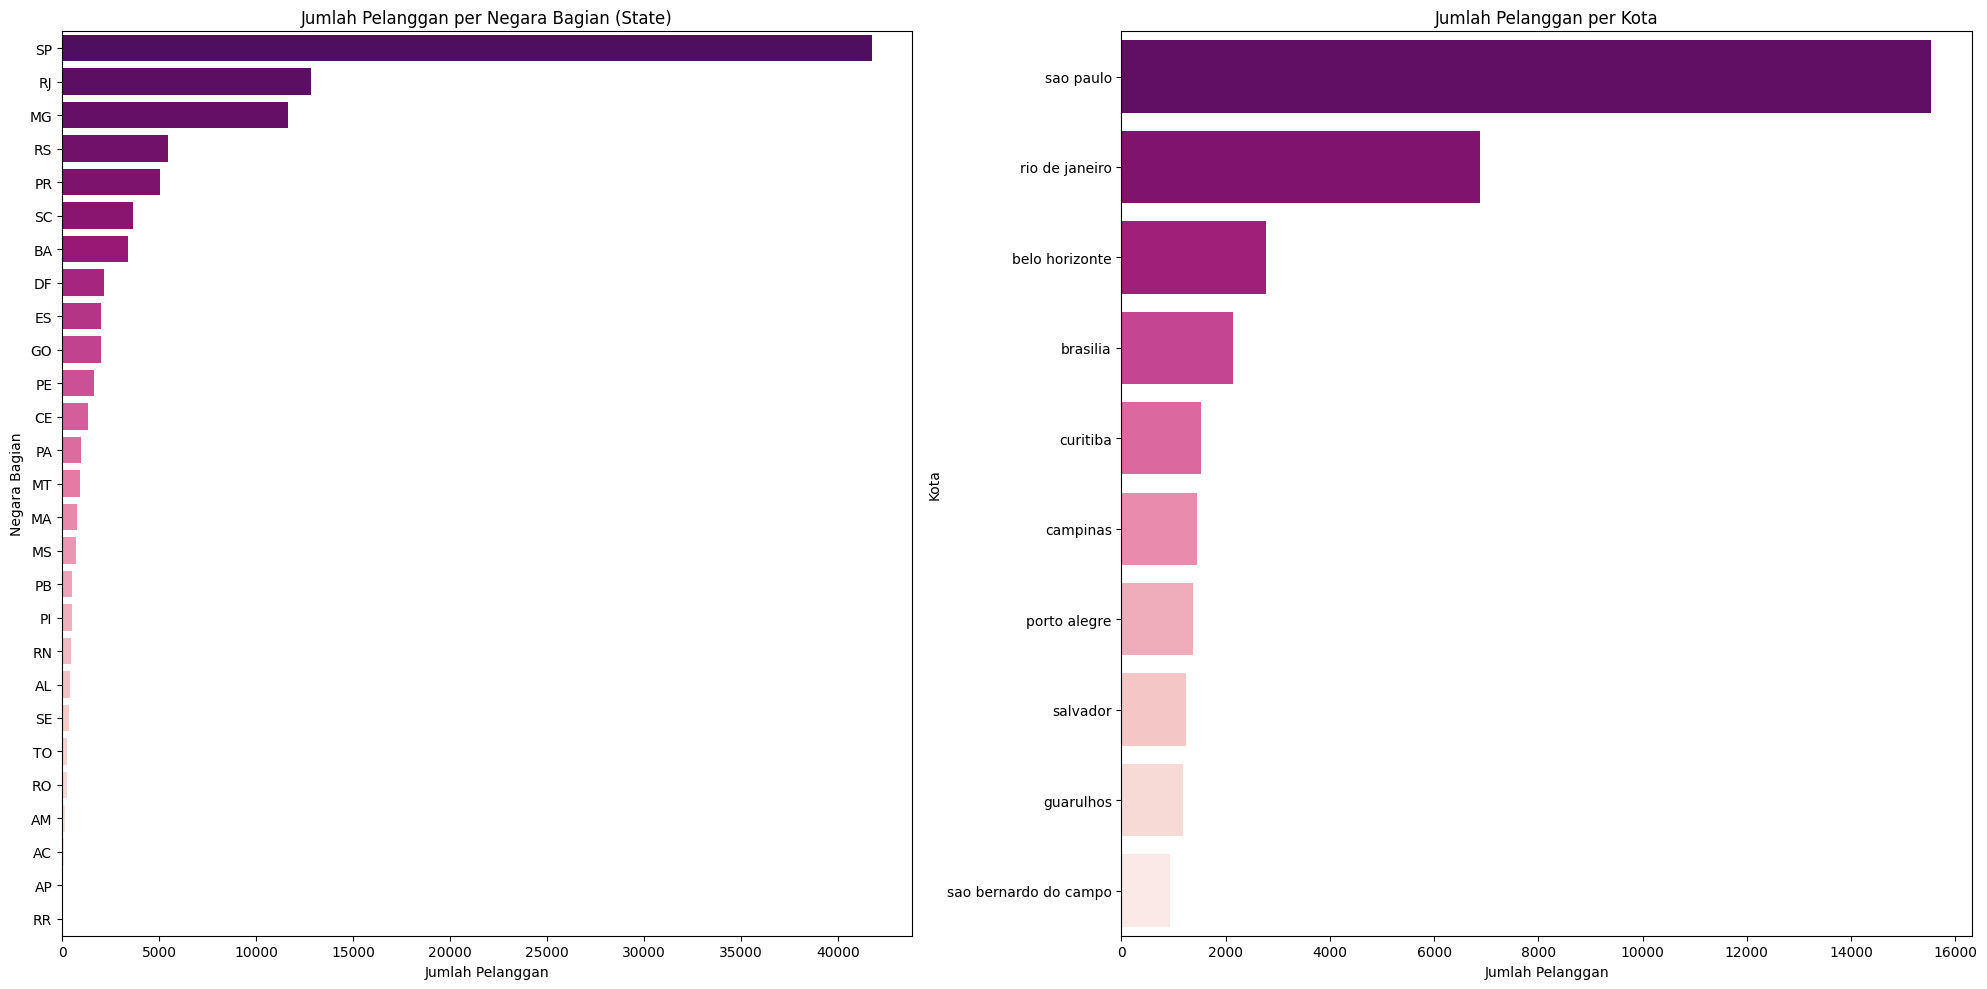

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
customers_state_grouped_sorted = customers_state_grouped.sort_values(by='customer_id', ascending=False)
customers_city_grouped_sorted = customers_city_grouped.head(10).sort_values(by='customer_id', ascending=False)

sns.barplot(ax=axes[0], x='customer_id', y='customer_state', hue='customer_state', data=customers_state_grouped_sorted, palette='RdPu_r', legend=False)
axes[0].set_xlabel('Jumlah Pelanggan')
axes[0].set_ylabel('Negara Bagian')
axes[0].set_title('Jumlah Pelanggan per Negara Bagian (State)')

sns.barplot(ax=axes[1], x='customer_id', y='customer_city', hue='customer_city', data=customers_city_grouped_sorted, palette='RdPu_r', legend=False)
axes[1].set_xlabel('Jumlah Pelanggan')
axes[1].set_ylabel('Kota')
axes[1].set_title('Jumlah Pelanggan per Kota')

plt.tight_layout()

plt.show()


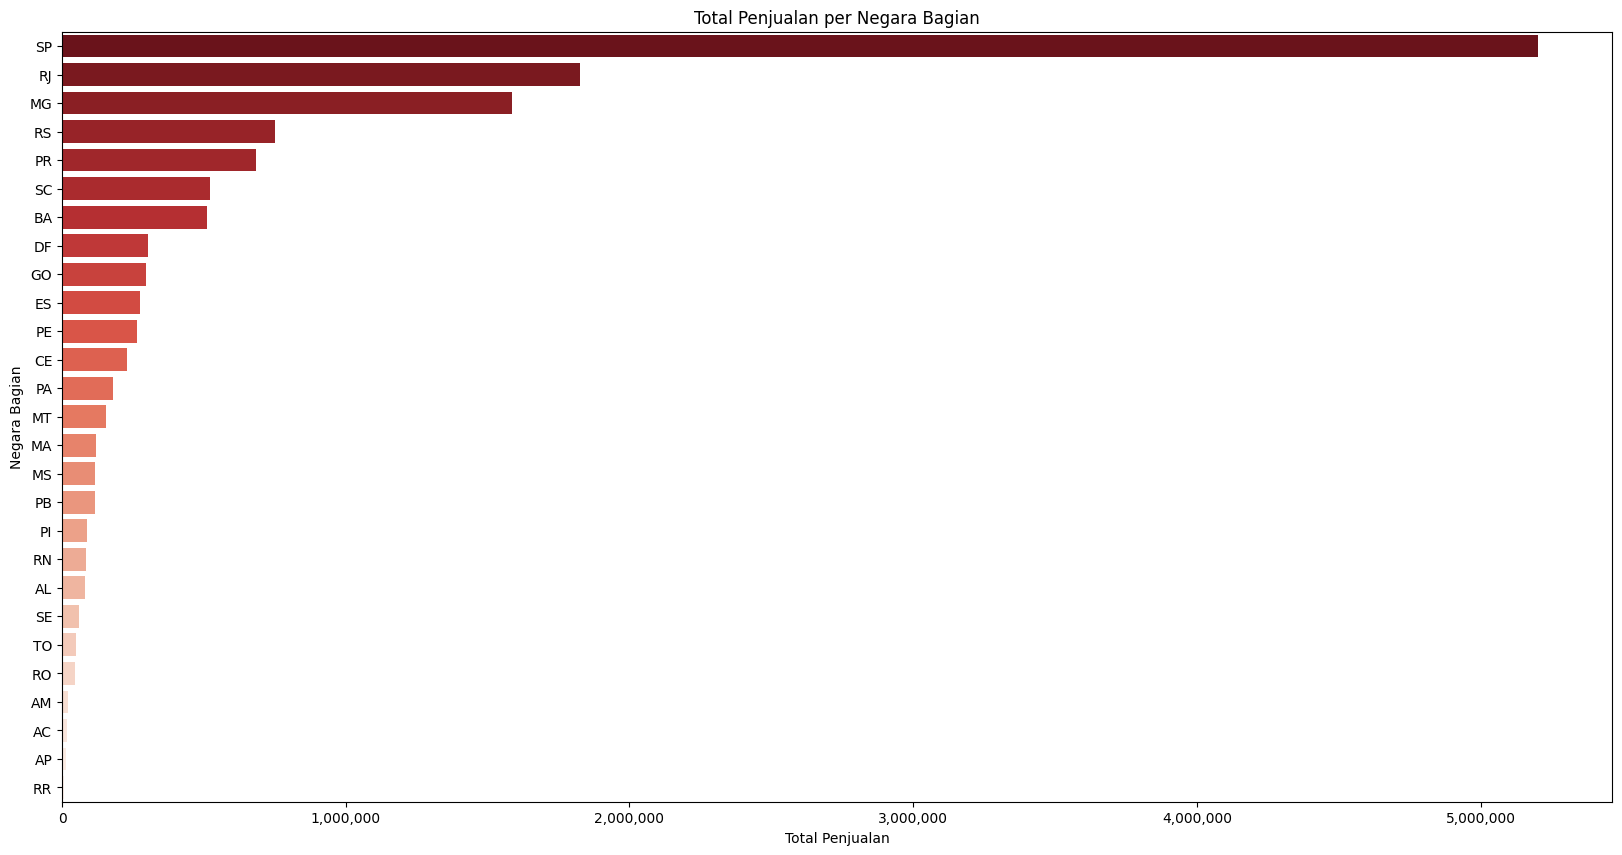

In [192]:
merged_df = pd.merge(dataframes['orders'], dataframes['customers'], on='customer_id')
final_df = pd.merge(merged_df, dataframes['items'], on='order_id')

sum_of_price_per_state = final_df.groupby('customer_state')['price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x='price', y='customer_state', hue='customer_state', data=sum_of_price_per_state, palette='Reds_r')
plt.xlabel('Total Penjualan')
plt.ylabel('Negara Bagian')
plt.title('Total Penjualan per Negara Bagian')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

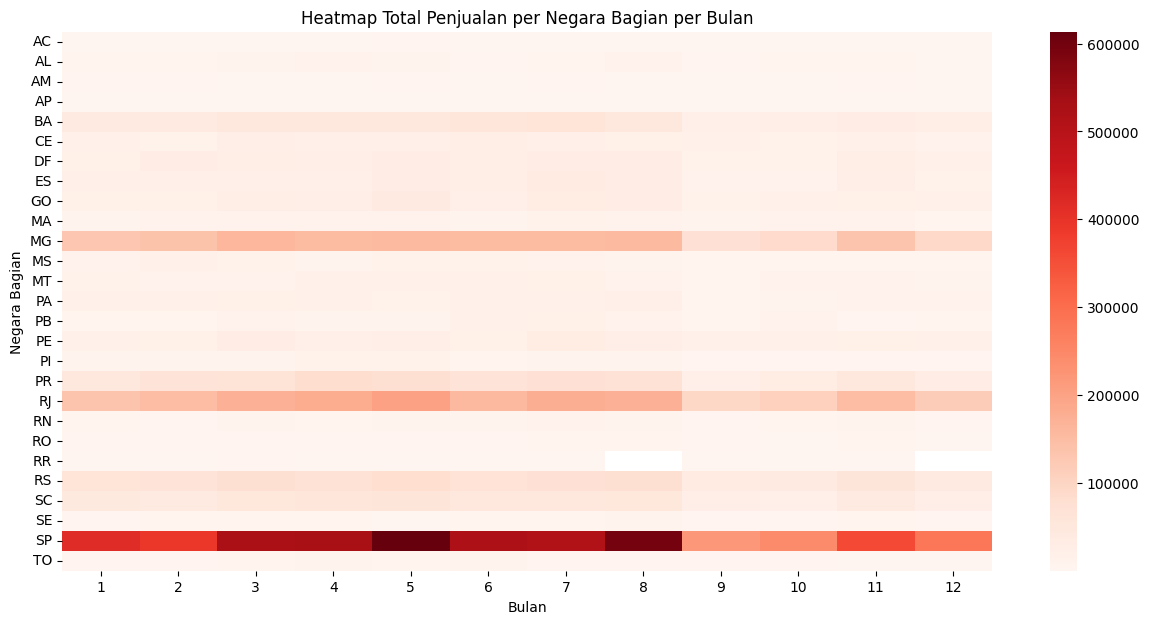

In [193]:
sales_heatmap_data = final_df.groupby(['customer_state', 'month'])['price'].sum().unstack()
plt.figure(figsize=(15, 7))
sns.heatmap(sales_heatmap_data, cmap='Reds')
plt.title('Heatmap Total Penjualan per Negara Bagian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Negara Bagian')
plt.show()



São Paulo (SP) mendominasi dalam jumlah pelanggan, jumlah pesanan, dan total penjualan, menandakan peran pentingnya sebagai pusat ekonomi dan komersial di Brasil. Ini menggambarkan potensi pasar yang besar dan pentingnya wilayah ini bagi pengambil keputusan bisnis dan pemasar.

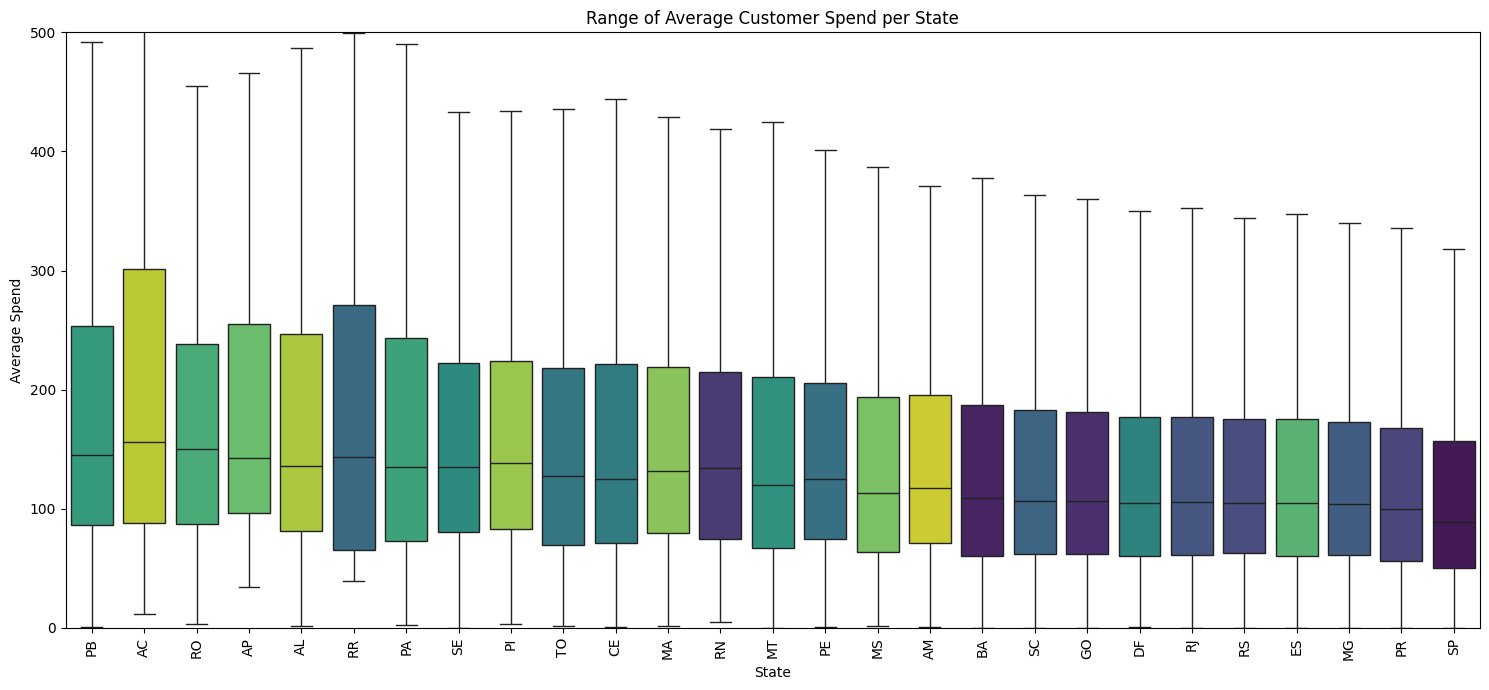

In [194]:
state_spending = orders_payments_customers.groupby('customer_state')['payment_value'].mean().reset_index()

state_spending_sorted = state_spending.sort_values('payment_value', ascending=False)

min_values = state_spending_sorted.groupby('customer_state')['payment_value'].min()
max_values = state_spending_sorted.groupby('customer_state')['payment_value'].max()

spending_range = pd.DataFrame({'customer_state': min_values.index, 'min_value': min_values.values, 'max_value': max_values.values})

plt.figure(figsize=(15, 7))
sns.boxplot(x='customer_state', y='payment_value', hue='customer_state', data=orders_payments_customers, order=state_spending_sorted['customer_state'], palette='viridis', legend=False, showfliers=False)
plt.ylim(0, 500)
plt.title('Range of Average Customer Spend per State')
plt.xlabel('State')
plt.ylabel('Average Spend')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Namun pada bar di atas, menunjukkan bahwa São Paulo (SP) memiliki jumlah pelanggan dan total penjualan tertinggi, tetapi rata-rata pengeluaran per pelanggan termasuk yang terendah, yang dimana bisa menunjukkan beberapa dinamika pasar dan perilaku konsumen di São Paulo, dimana mereka mungkin cenderung membeli produk dengan harga yang lebih rendah atau hanya melakukan pembelian yang esensial.

## Pertanyaan 2: Apakah penjualan e-commerce di Brazil mengalami pertumbuhan dari waktu ke waktu?

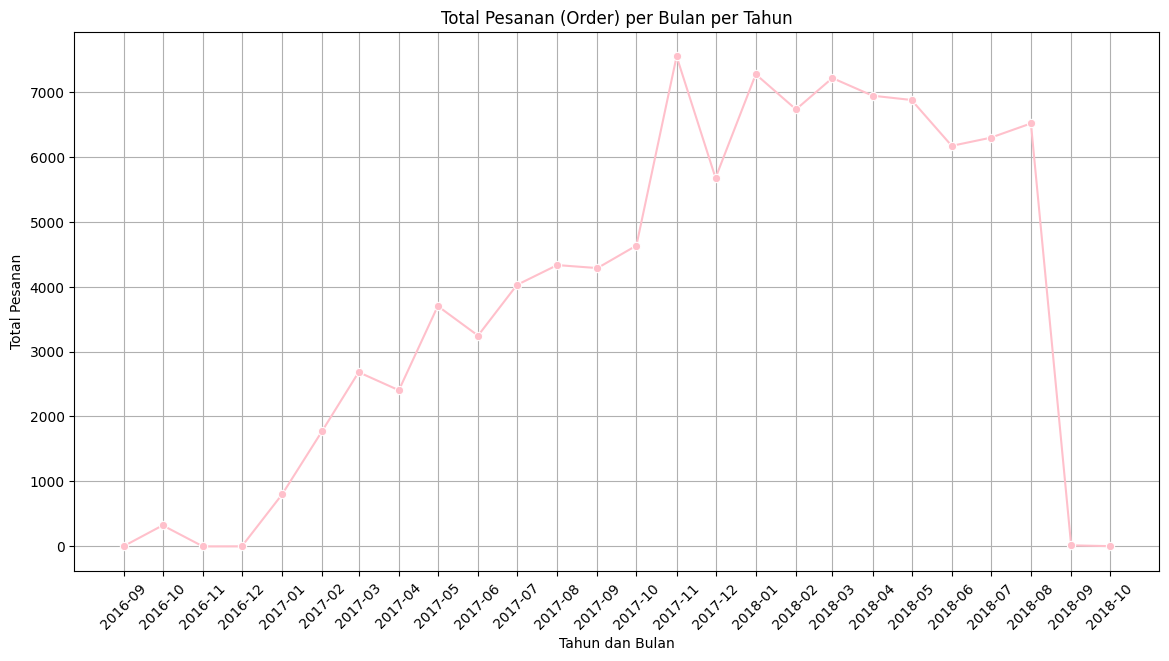

In [195]:
orders_per_month_year['year_month'] = pd.to_datetime(orders_per_month_year[['year', 'month']].assign(DAY=1))

start_date = orders_per_month_year['year_month'].min()
end_date = orders_per_month_year['year_month'].max()

all_months = pd.date_range(start=start_date, end=end_date, freq='MS')
all_months_df = pd.DataFrame(all_months, columns=['year_month'])
orders_per_month_year_complete = pd.merge(all_months_df, orders_per_month_year, on='year_month', how='left').fillna(0)
orders_per_month_year_complete.sort_values(by='year_month', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='total_orders', data=orders_per_month_year_complete, color='pink', marker="o")

plt.title('Total Pesanan (Order) per Bulan per Tahun')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Total Pesanan')
plt.xticks(rotation=45)
plt.grid(True)

plt.gca().set_xticks(orders_per_month_year_complete['year_month'])
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in orders_per_month_year_complete['year_month']], rotation=45)

plt.show()

Untuk total pesanan per bulan per tahunnya, cenderung meningkat seiring berjalannya waktu (mungkin perlu diabaikan dua bulan terakhir karena data mungkin belum lengkap).

Yang juga mempengaruhi total pembayaran per bulannya yang cenderung meningkat (mungkin perlu diabaikan dua bulan terakhir karena data mungkin belum lengkap).

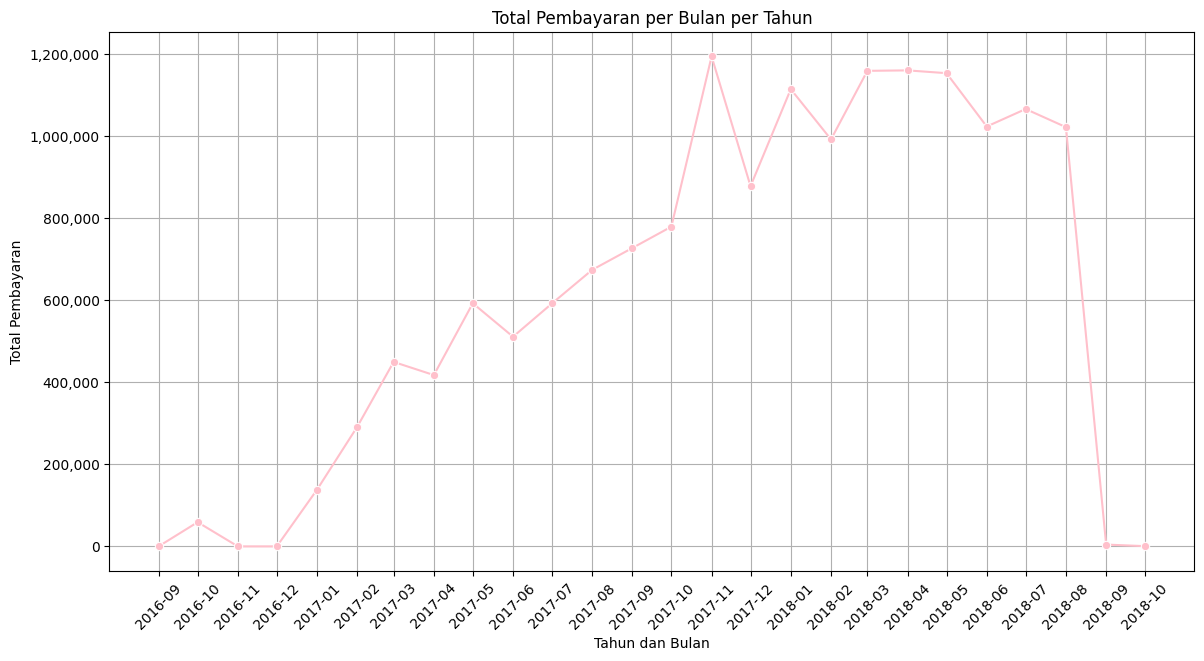

In [196]:
total_payment_per_month_year['year_month'] = pd.to_datetime(total_payment_per_month_year[['year', 'month']].assign(DAY=1))

start_date = total_payment_per_month_year['year_month'].min()
end_date = total_payment_per_month_year['year_month'].max()
all_months = pd.date_range(start=start_date, end=end_date, freq='MS')

all_months_df = pd.DataFrame(all_months, columns=['year_month'])
total_payment_per_month_year_complete = pd.merge(all_months_df, total_payment_per_month_year, on='year_month', how='left').fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='payment_value', data=total_payment_per_month_year_complete, color='pink', marker="o")
plt.title('Total Pembayaran per Bulan per Tahun')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Total Pembayaran')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().set_xticks(total_payment_per_month_year_complete['year_month'])
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in total_payment_per_month_year_complete['year_month']], rotation=45)

def format_num(x, pos):
    return '{:,.0f}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))
plt.show()


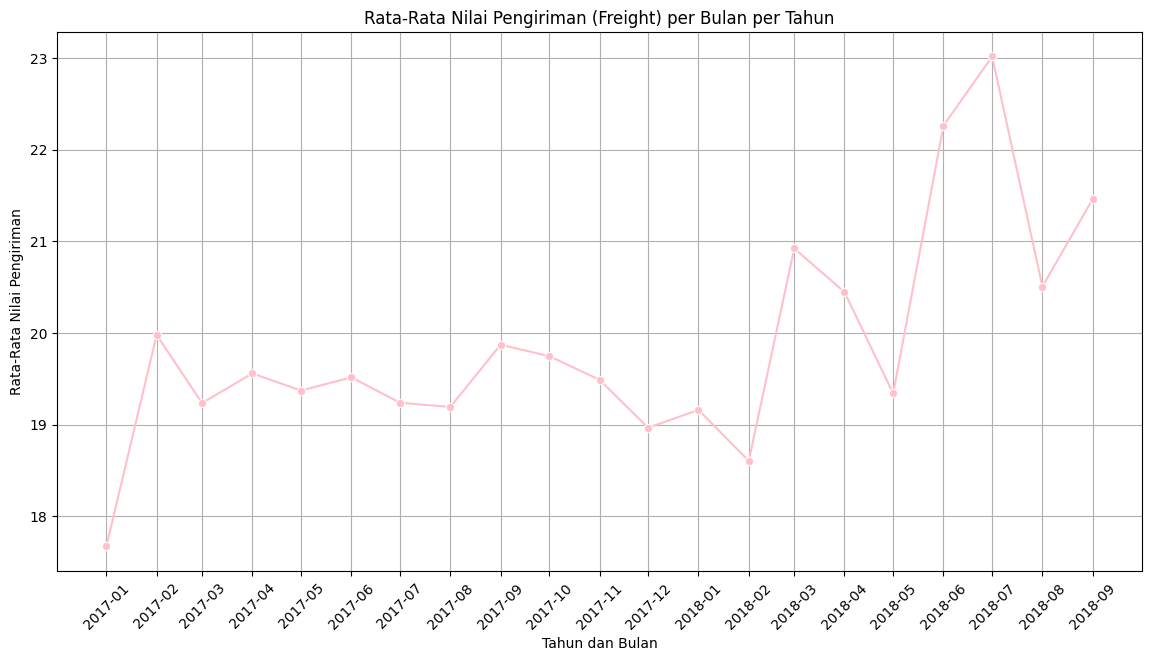

In [197]:
avg_freight_per_month_year['year_month'] = pd.to_datetime(avg_freight_per_month_year[['year', 'month']].assign(DAY=1))

start_date = '2017-01-01'
end_date = avg_freight_per_month_year['year_month'].max()
all_months = pd.date_range(start=start_date, end=end_date, freq='MS')

all_months_df = pd.DataFrame(all_months, columns=['year_month'])
avg_freight_per_month_year_complete = pd.merge(all_months_df, avg_freight_per_month_year, on='year_month', how='left').fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='freight_value', data=avg_freight_per_month_year_complete, color='pink', marker="o")

plt.title('Rata-Rata Nilai Pengiriman (Freight) per Bulan per Tahun')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Rata-Rata Nilai Pengiriman')
plt.xticks(rotation=45)
plt.grid(True)

plt.gca().set_xticks(avg_freight_per_month_year_complete['year_month'])
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in avg_freight_per_month_year_complete['year_month']], rotation=45)

plt.show()

Beberapa puncak yang terlihat pada grafik dapat mengindikasikan adanya peningkatan aktivitas e-commerce, kemungkinan selama periode promosi atau musim belanja yang sibuk.

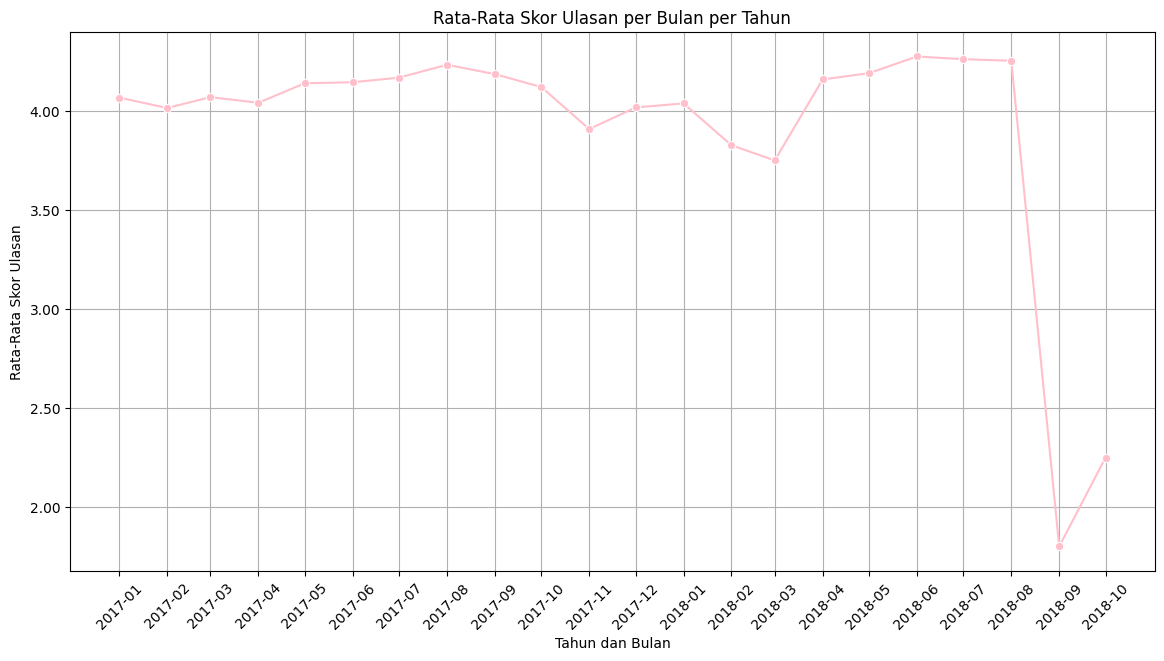

In [198]:
avg_review_score_per_month_year['year_month'] = pd.to_datetime(avg_review_score_per_month_year[['year', 'month']].assign(DAY=1))
avg_review_score_per_month_year = avg_review_score_per_month_year.sort_values(by='year_month')

start_date = '2017-01-01'
end_date = avg_review_score_per_month_year['year_month'].max()

all_months = pd.date_range(start=start_date, end=end_date, freq='MS')

all_months_df = pd.DataFrame(all_months, columns=['year_month'])
avg_review_score_per_month_year_complete = pd.merge(all_months_df, avg_review_score_per_month_year, on='year_month', how='left').fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='review_score', data=avg_review_score_per_month_year_complete, color='pink', marker="o")

plt.title('Rata-Rata Skor Ulasan per Bulan per Tahun')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Rata-Rata Skor Ulasan')

plt.xticks(rotation=45)
plt.grid(True)

plt.gca().set_xticks(avg_review_score_per_month_year_complete['year_month'])
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in avg_review_score_per_month_year_complete['year_month']], rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

plt.show()

Stabilitas dalam skor ulasan yang tinggi, seperti yang dilihat pada grafik, menunjukkan bahwa penyedia e-commerce di Brasil mungkin telah berhasil mempertahankan kualitas layanan dan produk yang baik dari waktu ke waktu.

# Conclusion

## Conclusion pertanyaan 1
São Paulo (SP) adalah negara bagian yang paling valuable di Brasil dalam hal e-commerce. Hal ini didasarkan pada jumlah pelanggan yang tinggi dan total penjualan yang substansial, yang menegaskan posisi São Paulo sebagai pasar terbesar dan paling penting untuk e-commerce di negara tersebut. Namun, rata-rata pengeluaran per pelanggan yang relatif rendah menunjukkan bahwa meskipun volume transaksi tinggi, nilai transaksi per pelanggan mungkin lebih kecil dibandingkan dengan negara bagian lain. Ini bisa mengindikasikan keberagaman dalam perilaku belanja pelanggan atau strategi penetapan harga yang kompetitif di São Paulo. Oleh karena itu, untuk strategi bisnis dan pemasaran, SP menawarkan potensi volume penjualan yang signifikan tetapi juga menghadirkan tantangan untuk meningkatkan nilai transaksi per pelanggan.

## Conclusion pertanyaan 2
Data yang diperoleh dari berbagai metrik, seperti jumlah total pesanan per bulan, nilai total pembayaran, dan skor ulasan, menunjukkan indikasi pertumbuhan e-commerce di Brasil dari waktu ke waktu. Meskipun terdapat fluktuasi bulanan, tren umum menunjukkan adanya peningkatan aktivitas e-commerce, yang mungkin dipengaruhi oleh faktor-faktor seperti periode promosi, peningkatan kepercayaan konsumen, atau ekspansi pasar. Stabilitas dan kecenderungan skor ulasan yang tinggi juga menegaskan bahwa pelanggan merasa puas dengan pengalaman belanja mereka, yang merupakan aspek penting dalam pertumbuhan jangka panjang e-commerce. Oleh karena itu, meskipun ada variasi bulanan, secara keseluruhan terdapat tanda-tanda positif pertumbuhan e-commerce di Brasil.